# Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Loading dataframe 
df = pd.read_csv("Data/data.csv")

## <font color='blue'>dicionario de dados:</font>

### <font color='green'>variaveis preditoras;</font>

REGISTRATION      - Student registration number

   NAME           - Student's full name

   DISAPPROVALS_BL- Number of failures in the subject of "Business Law"

   DISAPPROVALS_EN- Number of failures in the subject of "Entrepreneurship"

   DISAPPROVALS_FM- Number of failures in the subject of "Financial Mathematics"

   DISAPPROVALS_OM - Number of failures in the subject of "Operational Management"

   NOTE_BL        - Student's grade point average in the subject of "Business Law" 

   NOTE_EN        - Student's grade point average in the subject of "Entrepreneurship"

   NOTE_FM        - Student's grade point average in the subject of "Financial Mathematics"

   NOTE_OM        - Student's grade point average in the subject of "Operational Management"

   ENGLISH        - Binary variable that indicates whether the student has knowledge of the english language                           (0 = YES ou 1 = NO)

   H_CLASS_PRES   - Hours face-to-face study performed by the student

   ONLINE_TASKS   - Number of online assignments delivered by student

   ABSENCES       - Number of accumulated student absences "all subjects" 

### <font color='green'> Target Variable</font>
 
PROFILE           - A string that indicates one of five possibilities:
   
   "EXCELLENT"    - Student does not need mentoring
   
   "VERY_GOOD"    - Student does not neeed mentoring
   
   "HUMAN"        - Student needs mentoring exclusively in subjects with humanities content
   
   "EXACTS"       - Student needs mentoring only in subjects with exact science content
   
   "DIFFICULTY"   - Student needs mentoring in two ou more subjects
   
PROFILE_N         - A numerical variables that indicates the possibilities from one to five
   
   "EXCELLENT" : 5
   
   "VERY_GOOD" : 4
   
   "HUMAN" : 3
   
   "EXACTS" : 2
   
   "DIFFICULTY" : 1

In [4]:
# Viewing dataframe
df

,REGISTRATION,NAME,DISAPPROVALS_BL,DISAPPROVALS_EN,DISAPPROVALS_FM,DISAPPROVALS_OM,NOTE_BL,NOTE_EN,NOTE_FM,NOTE_OM,ENGLISH,H_CLASS_PRES,ONLINE_TASKS,ABSENCES,PROFILE
0,502375,Márcia Illiglener,0,0,0,0,6.2,5.8,4.6,5.9,0.0,2,4,3,EXACTS
1,397093,Jason Jytereoman Izoimum,0,0,0,0,6.0,6.2,5.2,4.5,1.0,2,4,3,EXACTS
2,915288,Bartolomeu Inácio da Gama,0,0,0,0,7.3,6.7,7.1,7.2,0.0,5,0,3,HUMAN
3,192652,Fernanda Guedes,1,3,1,1,0.0,0.0,0.0,0.0,1.0,4,4,4,DIFFICULTY
4,949491,Alessandre Borba Gomes,1,3,1,1,0.0,0.0,0.0,0.0,1.0,5,2,5,DIFFICULTY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,856673,Laércio Mário da Silva,0,0,0,0,7.0,7.9,5.8,7.0,1.0,9,5,6,EXACTS
19996,576100,Cibele Quésia Poza,1,1,1,1,0.0,0.0,0.0,NaN,1.0,3,2,5,DIFFICULTY
19997,888739,Marcielle Chale Bape,0,0,0,0,7.9,7.6,8.3,7.2,NaN,8,3,1,EXCELLENT
19998,722743,Suzanne Mirian Mourão,0,0,1,1,6.3,5.1,0.0,0.0,1.0,3,2,6,DIFFICULTY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   REGISTRATION     20000 non-null  int64  
 1   NAME             20000 non-null  object 
 2   DISAPPROVALS_BL  20000 non-null  int64  
 3   DISAPPROVALS_EN  20000 non-null  int64  
 4   DISAPPROVALS_FM  20000 non-null  int64  
 5   DISAPPROVALS_OM  20000 non-null  int64  
 6   NOTE_BL          20000 non-null  float64
 7   NOTE_EN          20000 non-null  float64
 8   NOTE_FM          20000 non-null  float64
 9   NOTE_OM          16284 non-null  float64
 10  ENGLISH          16372 non-null  float64
 11  H_CLASS_PRES     20000 non-null  int64  
 12  ONLINE_TASKS     20000 non-null  int64  
 13  ABSENCES         20000 non-null  int64  
 14  PROFILE          20000 non-null  object 
dtypes: float64(5), int64(8), object(2)
memory usage: 2.3+ MB


In [6]:
# Dataframe format
df.shape

(20000, 15)

In [7]:
# Checking NA values
df.isna().sum()

REGISTRATION          0
NAME                  0
DISAPPROVALS_BL       0
DISAPPROVALS_EN       0
DISAPPROVALS_FM       0
DISAPPROVALS_OM       0
NOTE_BL               0
NOTE_EN               0
NOTE_FM               0
NOTE_OM            3716
ENGLISH            3628
H_CLASS_PRES          0
ONLINE_TASKS          0
ABSENCES              0
PROFILE               0
dtype: int64

In [8]:
df.PROFILE.value_counts()

EXACTS        8230
DIFFICULTY    7001
HUMAN         3196
VERY_GOOD      902
EXCELLENT      671
Name: PROFILE, dtype: int64

In [9]:
df.nunique()

REGISTRATION       19770
NAME               19867
DISAPPROVALS_BL        3
DISAPPROVALS_EN        3
DISAPPROVALS_FM        3
DISAPPROVALS_OM        3
NOTE_BL               50
NOTE_EN               57
NOTE_FM               69
NOTE_OM               56
ENGLISH                2
H_CLASS_PRES          26
ONLINE_TASKS           8
ABSENCES               8
PROFILE                5
dtype: int64

In [10]:
df.describe()

,REGISTRATION,DISAPPROVALS_BL,DISAPPROVALS_EN,DISAPPROVALS_FM,DISAPPROVALS_OM,NOTE_BL,NOTE_EN,NOTE_FM,NOTE_OM,ENGLISH,H_CLASS_PRES,ONLINE_TASKS,ABSENCES
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,16284.000000,16372.000000,20000.000000,20000.000000,20000.000000
mean,551148.271400,0.242850,0.242850,0.297650,0.293350,5.196560,5.080285,4.817630,4.534101,0.646286,5.102950,3.140300,4.060600
std,259488.766584,0.615055,0.615055,0.672813,0.661829,2.522545,2.523928,2.734775,2.509209,0.478136,4.118422,1.854909,1.674714
min,100003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,326554.250000,0.000000,0.000000,0.000000,0.000000,5.200000,4.900000,4.700000,4.500000,0.000000,2.000000,2.000000,3.000000
50%,550630.000000,0.000000,0.000000,0.000000,0.000000,6.200000,5.900000,5.500000,5.400000,1.000000,4.000000,3.000000,4.000000
75%,775524.750000,0.000000,0.000000,0.000000,0.000000,6.700000,6.700000,6.500000,6.200000,1.000000,6.000000,5.000000,6.000000
max,999995.000000,3.000000,3.000000,3.000000,3.000000,9.000000,9.400000,11.500000,10.000000,1.000000,25.000000,7.000000,8.000000


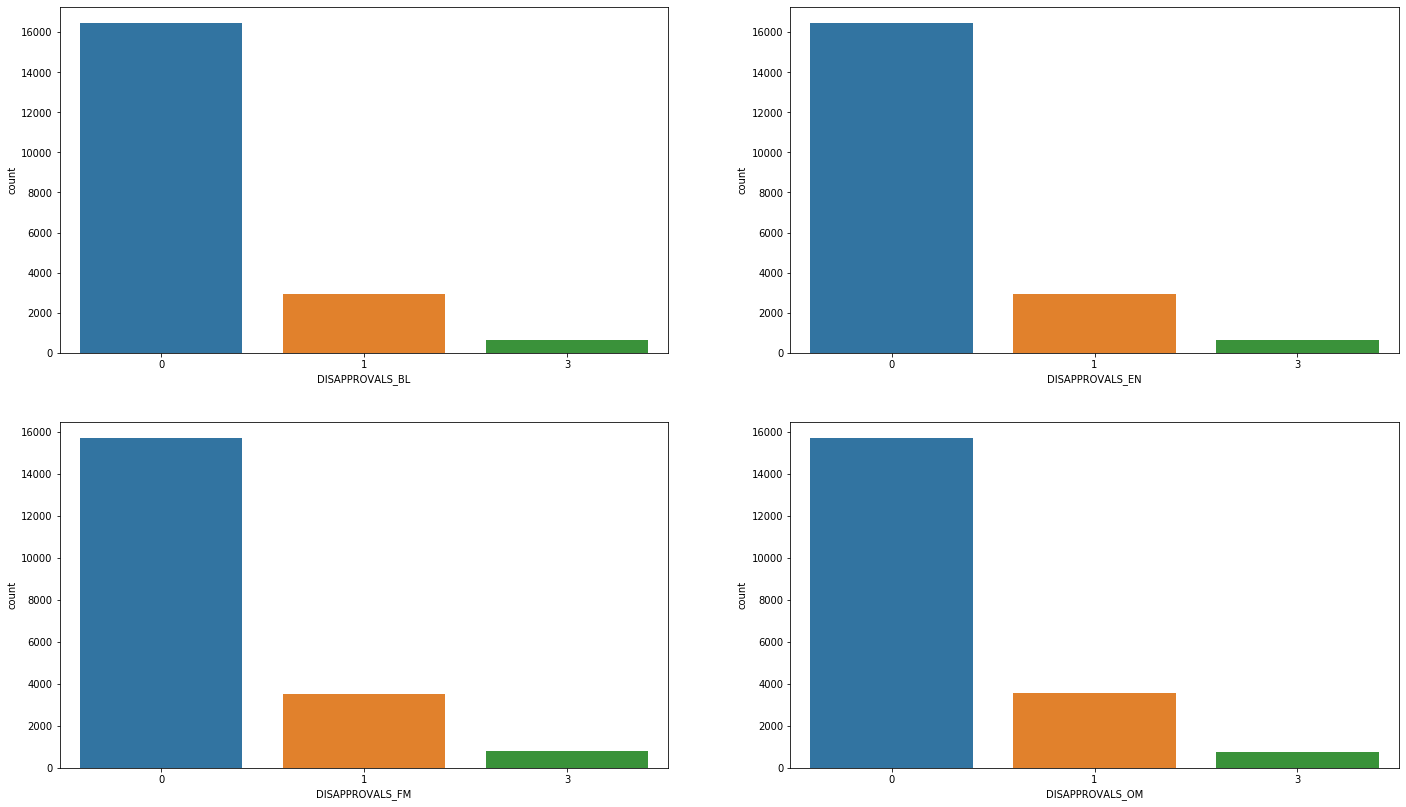

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 14))

sns.countplot(ax=axes[0, 0], x='DISAPPROVALS_BL', data=df)
sns.countplot(ax=axes[0, 1], x='DISAPPROVALS_EN', data=df)
sns.countplot(ax=axes[1, 0], x='DISAPPROVALS_FM', data=df)
sns.countplot(ax=axes[1, 1], x='DISAPPROVALS_OM', data=df)

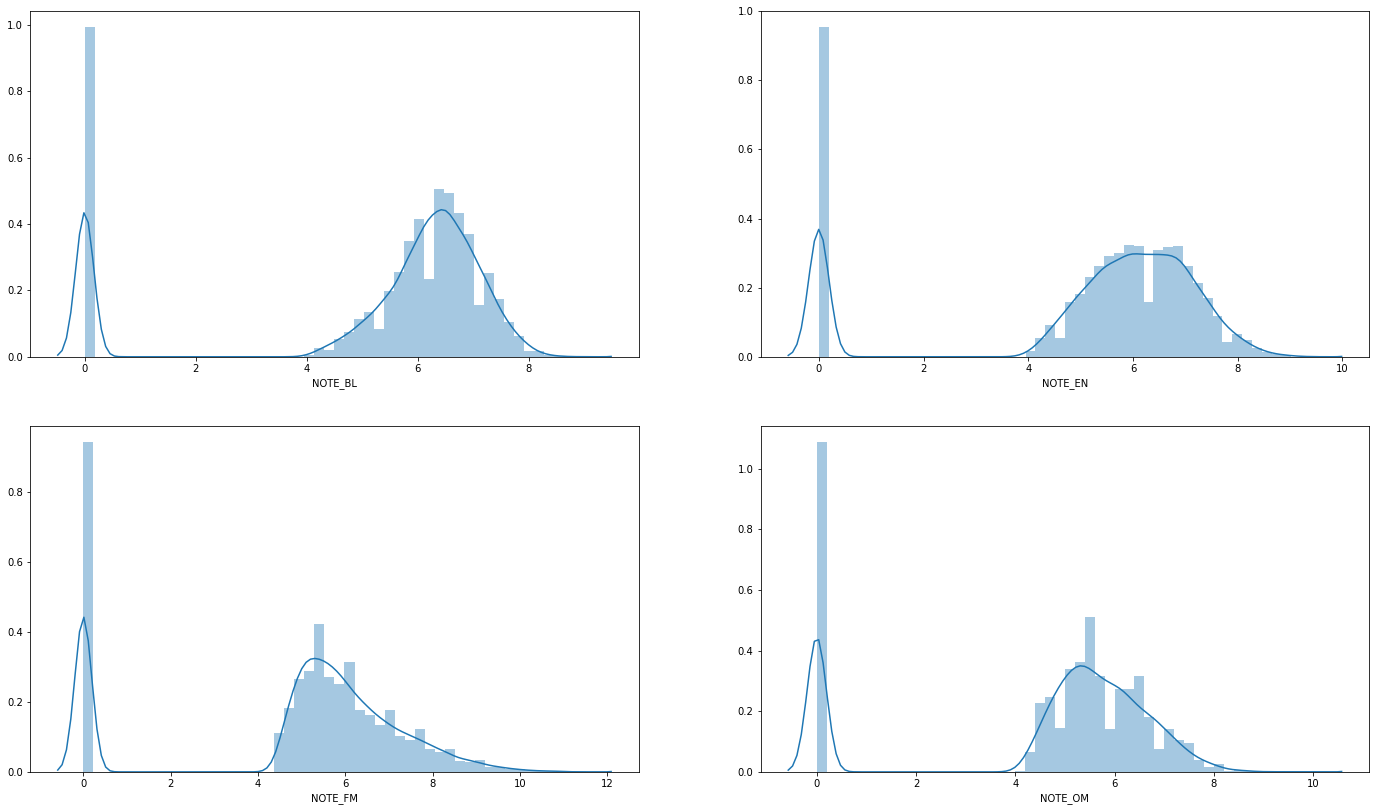

In [12]:
fig, axes = plt.subplots(nrows= 2, ncols= 2, figsize= (24, 14))

sns.distplot(df.NOTE_BL, ax= axes[0, 0])
sns.distplot(df.NOTE_EN, ax= axes[0, 1])
sns.distplot(df.NOTE_FM, ax= axes[1, 0])
sns.distplot(df.NOTE_OM.dropna(), ax= axes[1, 1])

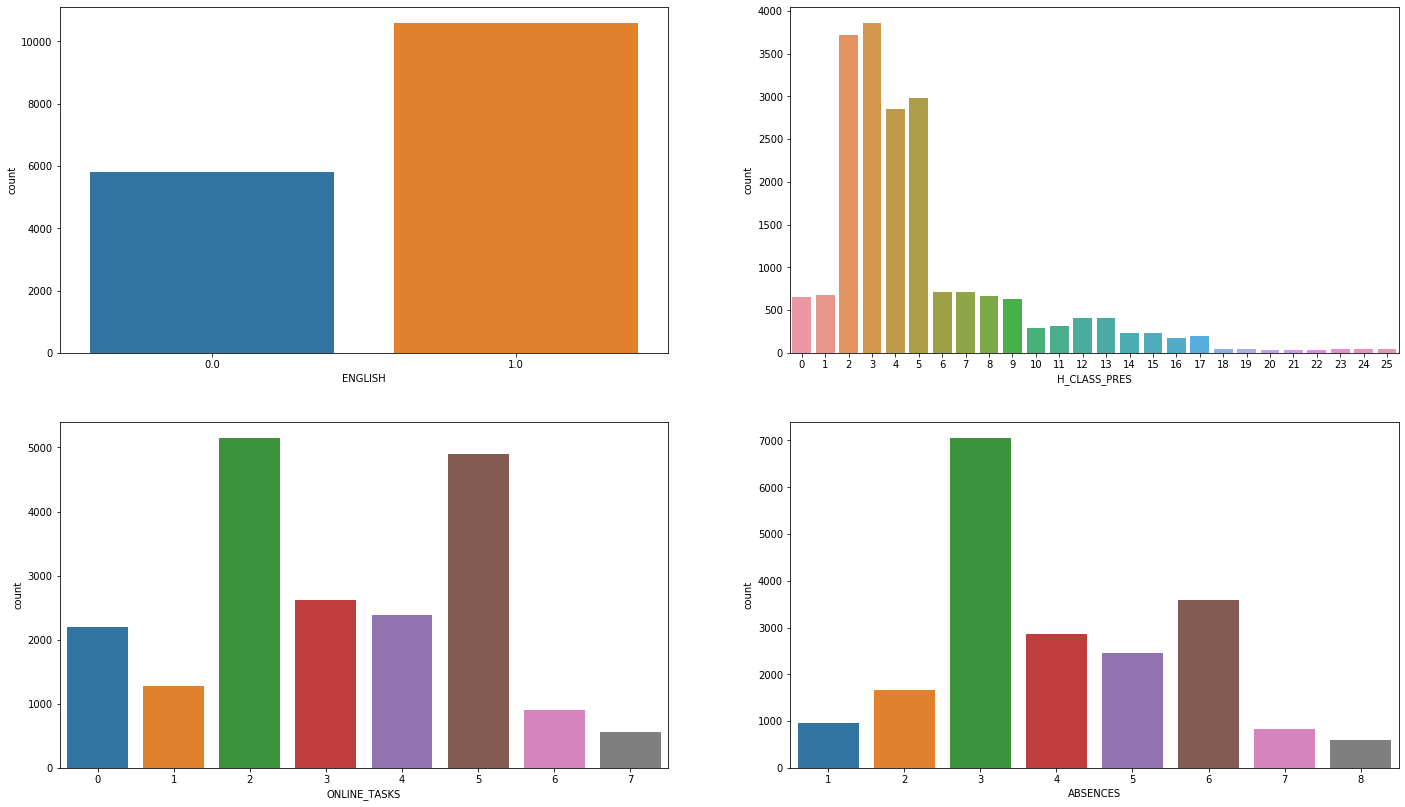

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 14))

sns.countplot(df.ENGLISH.dropna(), ax= axes[0, 0])
sns.countplot(df.H_CLASS_PRES, ax= axes[0, 1])
sns.countplot(df.ONLINE_TASKS, ax= axes[1, 0])
sns.countplot(df.ABSENCES, ax= axes[1, 1])

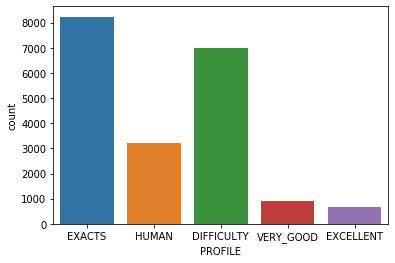

In [14]:
fig = plt.plot()
sns.countplot(x= 'PROFILE', data= df)

In [15]:
# correlation analysis
df.corr()

,REGISTRATION,DISAPPROVALS_BL,DISAPPROVALS_EN,DISAPPROVALS_FM,DISAPPROVALS_OM,NOTE_BL,NOTE_EN,NOTE_FM,NOTE_OM,ENGLISH,H_CLASS_PRES,ONLINE_TASKS,ABSENCES
REGISTRATION,1.000000,-0.007681,-0.010415,-0.010435,-0.014064,0.010366,0.009687,0.008253,0.013927,-0.001675,0.008386,-0.008959,-0.006903
DISAPPROVALS_BL,-0.007681,1.000000,0.718194,0.627279,0.635341,-0.813435,-0.794798,-0.692948,-0.710445,0.056715,-0.055391,-0.085484,0.094888
DISAPPROVALS_EN,-0.010415,0.718194,1.000000,0.630179,0.626988,-0.813435,-0.794798,-0.692389,-0.710117,0.060648,-0.065024,-0.086449,0.097509
DISAPPROVALS_FM,-0.010435,0.627279,0.630179,1.000000,0.716056,-0.724459,-0.713168,-0.779373,-0.801010,0.065121,-0.064817,-0.090557,0.102211
DISAPPROVALS_OM,-0.014064,0.635341,0.626988,0.716056,1.000000,-0.723049,-0.713200,-0.780861,-0.801819,0.069652,-0.069179,-0.090917,0.107030
NOTE_BL,0.010366,-0.813435,-0.813435,-0.724459,-0.723049,1.000000,0.969557,0.850942,0.867028,-0.106027,0.157820,0.158549,-0.176007
NOTE_EN,0.009687,-0.794798,-0.794798,-0.713168,-0.713200,0.969557,1.000000,0.853037,0.869426,-0.115077,0.175144,0.167702,-0.178978
NOTE_FM,0.008253,-0.692948,-0.692389,-0.779373,-0.780861,0.850942,0.853037,1.000000,0.948487,-0.128408,0.213406,0.186934,-0.200538
NOTE_OM,0.013927,-0.710445,-0.710117,-0.801010,-0.801819,0.867028,0.869426,0.948487,1.000000,-0.116421,0.181685,0.169990,-0.180111
ENGLISH,-0.001675,0.056715,0.060648,0.065121,0.069652,-0.106027,-0.115077,-0.128408,-0.116421,1.000000,-0.174072,-0.149433,0.141218


In [16]:
serie = df.PROFILE
serie = serie.map({"EXCELLENT": 5,
                   "VERY_GOOD": 4,
                   "HUMAN": 3,
                   "EXACTS": 2,
                   "DIFFICULTY": 1})
df.corrwith(serie)

REGISTRATION       0.000607
DISAPPROVALS_BL   -0.396639
DISAPPROVALS_EN   -0.396639
DISAPPROVALS_FM   -0.437322
DISAPPROVALS_OM   -0.437294
NOTE_BL            0.594732
NOTE_EN            0.624119
NOTE_FM            0.723315
NOTE_OM            0.653070
ENGLISH           -0.164139
H_CLASS_PRES       0.357693
ONLINE_TASKS       0.260994
ABSENCES          -0.272363
dtype: float64

In [17]:
df["PROFILE_N"] = serie 

In [18]:
df.shape

(20000, 16)

In [19]:
df.to_csv("Data/data2.csv", index= False)